### ASTR 3300/5300$-$003: Astrostatistics
***N. Pol***
___

# Homework 2
### Due: Friday, Feb 7, at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

In [111]:
import numpy as np

# Set parameters
sigma = 3
N = 10**5

# Draw samples from the full Gaussian and mask to get half-Gaussian samples
samples = np.random.normal(loc=0, scale=sigma, size=N)
positive_samples = samples[samples > 0]

# Compute the Monte Carlo estimate of E[x^3] for the half-Gaussian.
E_x3 = np.mean(positive_samples**3)

# Multiply by the constant factor to get the integral:
integral_estimate = (np.sqrt(2*np.pi)*sigma/2) * E_x3

# Exact value from the given formula
exact_value = 2 * sigma**4

print("Monte Carlo estimate:", integral_estimate)
print("Exact value:", exact_value)


Monte Carlo estimate: 159.4668563763182
Exact value: 162


In [112]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 3
exact_value = 2 * sigma**4  # exact value of the integral

# Different numbers of samples
N_values = [10**2, 10**3, 10**4,10**5,10**6]
n_batches = 100

results = {}

for N in N_values:
    batch_estimates = []
    for _ in range(n_batches):
        # Draw samples from the full Gaussian and keep only the positives
        samples = np.random.normal(loc=0, scale=sigma, size=N)
        positive_samples = samples[samples > 0]
        E_x3 = np.mean(positive_samples**3)
        # Monte Carlo estimate using the half-Gaussian formula
        integral_estimate = (np.sqrt(2*np.pi)*sigma/2) * E_x3
        batch_estimates.append(integral_estimate)
    results[N] = np.array(batch_estimates)


In [113]:
results

{100: array([120.6237521 , 211.7565791 , 143.26445724, 107.10886466,
        159.46376731, 143.38248091, 261.59119979, 106.24556485,
        117.57888966, 115.40411755, 194.85096345, 194.20733606,
        122.25930076, 199.85099313, 167.16790924, 160.39842083,
        230.0643221 ,  92.63365503, 129.29807168, 171.14710856,
        157.0070691 , 118.16690014, 156.15170228, 166.7795048 ,
        181.40910043, 124.52414421, 113.99471274, 193.63594022,
        139.65062213, 194.39997156, 171.11090747,  81.6038572 ,
        126.99782256, 178.7927564 , 127.89898867, 132.0261248 ,
        143.00651426, 103.23754821, 119.35479687, 147.21939766,
        122.73926342, 140.1838795 , 174.89917121, 256.64642357,
        148.20533791, 299.9962086 , 194.76163644, 192.50811572,
        136.34950094, 132.58446164, 101.33626426, 158.72915682,
        220.04822288, 206.1775078 , 148.57789347, 138.3295847 ,
        181.25100999, 178.30476802, 140.39509142, 165.71058421,
        227.91185067, 238.94311438,

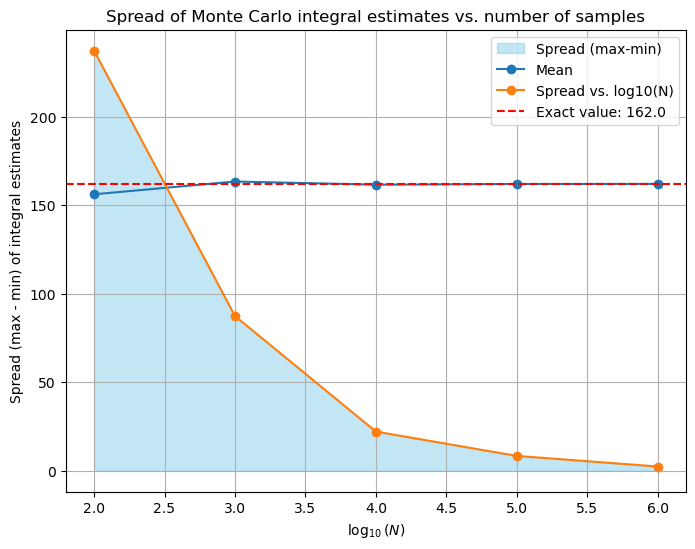

In [114]:
import matplotlib.pyplot as plt

# Arrays for plotting
logN = []
spreads = []
avg = []
for N in N_values:
    batch_estimates = results[N]
    spread = np.max(batch_estimates) - np.min(batch_estimates) #Calculating spread
    avg.append(np.mean(batch_estimates)) #Calculating mean
    logN.append(np.log10(N))
    spreads.append(spread)

# Create the plot
plt.figure(figsize=(8, 6))
plt.fill_between(logN, spreads, color='skyblue', alpha=0.5, label='Spread (max-min)')
plt.plot(logN, avg, 'o-', label='Mean')
plt.plot(logN, spreads, 'o-', label='Spread vs. log10(N)')
plt.axhline(y=exact_value, color='r', linestyle='--', label='Exact value: {:.1f}'.format(exact_value))
plt.xlabel(r'$\log_{10}(N)$')
plt.ylabel('Spread (max - min) of integral estimates')
plt.title('Spread of Monte Carlo integral estimates vs. number of samples')
plt.legend()
plt.grid(True)
plt.show()


In [115]:
# plt.figure(figsize=(8, 6))
# plt.fill_between(logN, spreads, color='skyblue', alpha=0.5, label='Spread (max-min)')
# plt.plot(logN, avg, 'o-', label='Mean')
# plt.plot(logN, spreads, 'o-', label='Spread vs. log10(N)')
# plt.axhline(y=exact_value, color='r', linestyle='--', label='Exact value: {:.1f}'.format(exact_value))
# plt.xlabel(r'$\log_{10}(N)$')
# plt.ylabel('Spread (max - min) of integral estimates')
# plt.title('Convergence of Mean')
# plt.ylim(150,170)
# plt.legend()
# plt.grid(True)
# plt.show()

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

Probabilty of people with IQ>145 =  0.13498980316301035
From Survival Function 0.13498980316300932
IQ corresponding to 1 in million 171.30136463234348


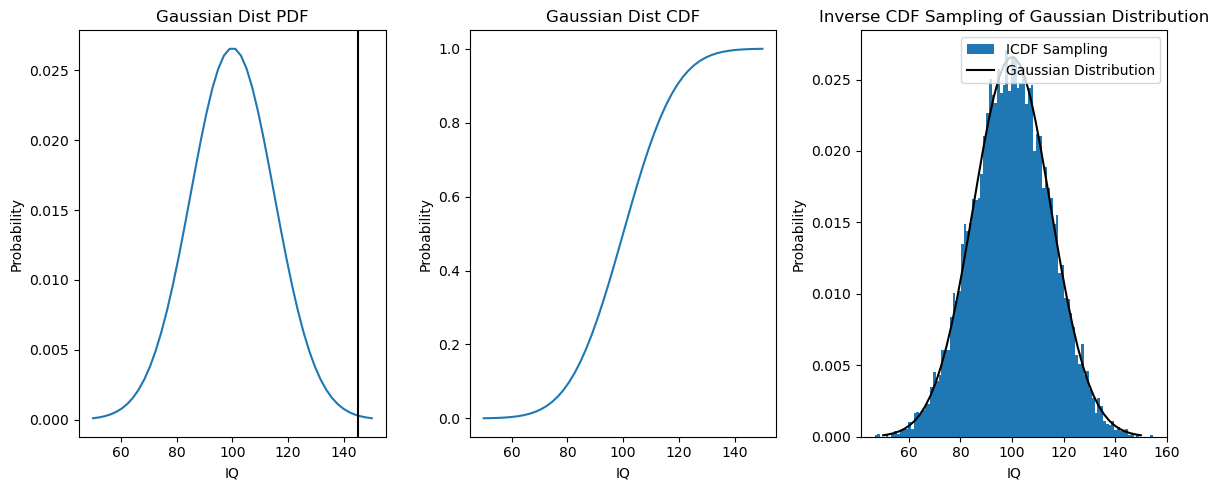

In [116]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np

mu = 100
sigma = 15
Gaussian = sp.stats.norm(loc = mu , scale = sigma)
x = np.linspace(50,150)
pdf_values = Gaussian.pdf(x)
cdf_values = Gaussian.cdf(x)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
axes[0].plot(x,pdf_values)
axes[0].axvline(145, color='black')
axes[0].set_title('Gaussian Dist PDF')
axes[0].set_xlabel('IQ')
axes[0].set_ylabel('Probability')

axes[1].plot(x,cdf_values)
axes[1].set_title('Gaussian Dist CDF')
axes[1].set_xlabel('IQ')
axes[1].set_ylabel('Probability')


rnd_10_draws = Gaussian.rvs(10)
pdf_145 = Gaussian.pdf(145)

uniform = sp.stats.uniform(0,1)
samples_for_ICDF = uniform.rvs(10**4)
sample_CDF = Gaussian.ppf(samples_for_ICDF)
axes[2].hist(sample_CDF,bins=100, label = 'ICDF Sampling',density = True)
axes[2].set_title('Inverse CDF Sampling of Gaussian Distribution')
axes[2].plot(x,pdf_values , color = 'black', label = 'Gaussian Distribution')
axes[2].set_xlabel('IQ')
axes[2].set_ylabel('Probability')
axes[2].legend()

p_l_145 = (1-Gaussian.cdf(145))*100
sf_145 = Gaussian.sf(145)*100
print('Probabilty of people with IQ>145 = ',p_l_145)
print('From Survival Function', sf_145)

one_in_million = 1/(10**6)
isf_million = Gaussian.isf(one_in_million)
print('IQ corresponding to 1 in million', isf_million)

plt.tight_layout()
plt.show()

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

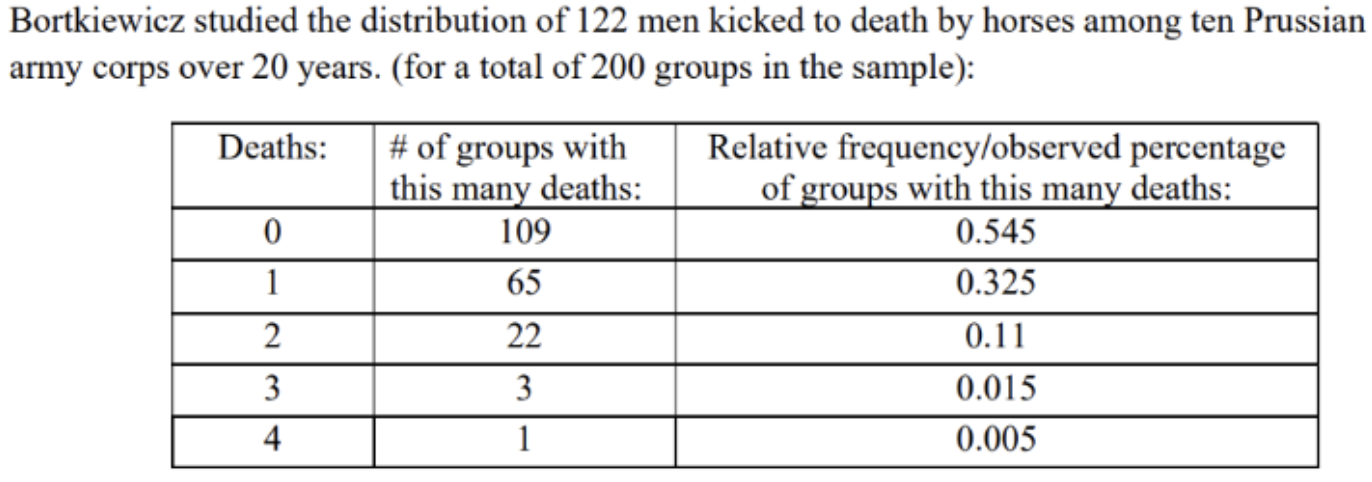

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

Estimated mu =  0.6100000000000001


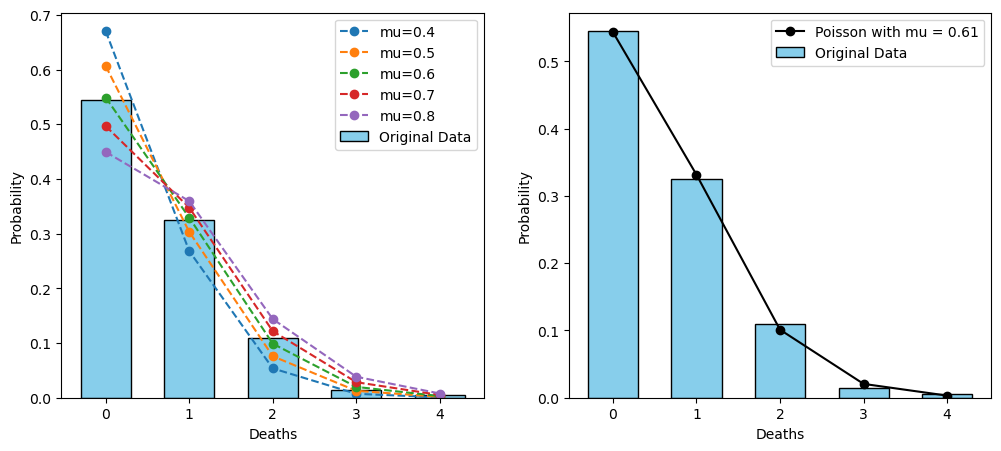

In [117]:
deaths = np.array([0,1,2,3,4])
prob = np.array([0.545,0.325,0.11,0.015,0.005])

pois_4 = sp.stats.poisson(0.4)
pois_5 = sp.stats.poisson(0.5)
pois_6 = sp.stats.poisson(0.6)
pois_7 = sp.stats.poisson(0.7)
pois_8 = sp.stats.poisson(0.8)

x = np.arange(0,5)
y4 = pois_4.pmf(x)
y5 = pois_5.pmf(x)
y6 = pois_6.pmf(x)
y7 = pois_7.pmf(x)
y8 = pois_8.pmf(x)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].bar(deaths,prob, color='skyblue', edgecolor='black', width=0.6, label = 'Original Data')
axes[0].plot(x,y4,label='mu=0.4',linestyle ='--',marker='o')
axes[0].plot(x,y5,label='mu=0.5',linestyle ='--',marker='o')
axes[0].plot(x,y6,label='mu=0.6',linestyle ='--',marker='o')
axes[0].plot(x,y7,label='mu=0.7',linestyle ='--',marker='o')
axes[0].plot(x,y8,label='mu=0.8',linestyle ='--',marker='o')
axes[0].set_xlabel('Deaths')
axes[0].set_ylabel('Probability')
axes[0].legend()

estimated_mu = np.sum(deaths*prob)
print('Estimated mu = ',estimated_mu)
guess_pois = sp.stats.poisson(estimated_mu)
x_val = np.arange(0,8)
y_estimated = guess_pois.pmf(deaths)
axes[1].plot(x,y_estimated,marker='o',color='black',label = 'Poisson with mu = 0.61')
axes[1].bar(deaths,prob, color='skyblue', edgecolor='black', width=0.6, label = 'Original Data')
axes[1].set_xlabel('Deaths')
axes[1].set_ylabel('Probability')
axes[1].legend()

plt.show()